<h1><center> Cancer Classification </center></h1>

## Objectives

__This project is a course project from IBM Data Science. The dataset is copied from that course.__ 

In this project, human cell records are used to rain a model and to classify cells to wethter the samples are benign or malignant. An organization of this project is:

<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>
            <a>Download Data</a>
        </li>
     </ul>
    <ul>
        <li>
            <a>Data Wrangling</a>
            <ul>
                <li>Deal wiht Missing Data</li>
                <li>Correct Data Format</li>
            </ul>
        </li>
     </ul>
     <ul>
        <li>
            <a>Data Exploratory</a>
            <ul>
                <li>Visualization</li>
            </ul>
        </li>
    </ul>
    <ul>
        <li>
            <a>SVM Model Development</a>
            <ul>
                <li>Linear</li>
                <li>Polynomial</li>
                <li>RBF</li>
                <li>Sigmoid</li>
            </ul>
        </li>
    </ul>
</div>

<hr>

This dataset is publicly available from the UCI Machine Learning Repository (Asunciion and Newman, 2007). The dataset consists of several hundred human cell sample records, each of which contains the values of a set of cell characteristics. The fields in each record are:

|Field name|Description|
|--- |--- |
|ID|Patient ID|
|Clump|Clump thickness|
|UnifSize|Uniformity of cell size|
|UnifShape|Uniformity of cell shape|
|MargAdh|Marginal adhesion|
|SingEpiSize|Single epithelial cell size|
|BareNuc|Bare nuclei|
|BlandChrom|Bland chromatin|
|NormNucl|Normal nucleoli|
|Mit|Mitoses|
|Class|Benign or malignant|

In [1]:
 # Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline

## 1. Download Data

In [3]:
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv'

In [4]:
#download the data
cell_data = pd.read_csv(file_name)

In [5]:
#display the first 10 rows of data
cell_data.head(10)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


The characteristics of the cell samples from each patient are contained in fields __Clump__ to __Mit__. The values are graded form 1 to 10, with 1 being the closest to benign.

The __Class__ field consists the diagonosis, as connfirmed by separate medical procedures, as to whether the samples are benign (value = 2) or malignant (value = 4).

## 2. Data Wrangling

In [6]:
#Evaluating the missing data
missing_data = cell_data.isnull()
missing_data.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


"True" measn the data is missing. From the first 5 rows, there seem no missing data. 

In [7]:
#Here use info() to count non-null values or missing values in each column
cell_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


Nice. There is no missing data in this dataset.

#### Correct data format

In [8]:
# check the data type
cell_data.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

It looks like __BareNuc__ column has some values that are not numerical. Let's have a check. 

In [9]:
cell_data['BareNuc'].value_counts()

BareNuc
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64

There are __?__, which should be removed from the data.

In [10]:
# replacing ? with np.nan
cell_data.replace('?', np.NaN, inplace = True)

In [11]:
#Since patient information is unique, we just remomve those misssing data. 
cell_data = cell_data.dropna(subset=['BareNuc'],axis=0)

In [12]:
#change data format using astype()
cell_data[['BareNuc']] = cell_data[['BareNuc']].astype('int')

In [13]:
cell_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ID           683 non-null    int64
 1   Clump        683 non-null    int64
 2   UnifSize     683 non-null    int64
 3   UnifShape    683 non-null    int64
 4   MargAdh      683 non-null    int64
 5   SingEpiSize  683 non-null    int64
 6   BareNuc      683 non-null    int32
 7   BlandChrom   683 non-null    int64
 8   NormNucl     683 non-null    int64
 9   Mit          683 non-null    int64
 10  Class        683 non-null    int64
dtypes: int32(1), int64(10)
memory usage: 61.4 KB


## 3. Exploratory Data Analysis

Data Exploratory or data analysis is requried to find the features or characteristics of the data. Here, we just use visulization to see the distribution of __Class__.

Let's first calculate the correlation between variabels. 

In [14]:
cell_data.corr()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
ID,1.000000,-0.056350,-0.041396,-0.042221,-0.069630,-0.048644,-0.099248,-0.061966,-0.050699,-0.037972,-0.084701
Clump,-0.056350,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
UnifSize,-0.041396,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
UnifShape,-0.042221,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
MargAdh,-0.069630,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
SingEpiSize,-0.048644,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
BareNuc,-0.099248,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
BlandChrom,-0.061966,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
NormNucl,-0.050699,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
Mit,-0.037972,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448


In [15]:
cell_data['Clump'].value_counts()

Clump
1     139
5     128
3     104
4      79
10     69
2      50
8      44
6      33
7      23
9      14
Name: count, dtype: int64

In [16]:
cell_data['UnifSize'].value_counts()

UnifSize
1     373
10     67
3      52
2      45
4      38
5      30
8      28
6      25
7      19
9       6
Name: count, dtype: int64

In [17]:
cell_data['UnifShape'].value_counts()

UnifShape
1     346
10     58
2      58
3      53
4      43
5      32
7      30
6      29
8      27
9       7
Name: count, dtype: int64

In [18]:
cell_data['MargAdh'].value_counts()

MargAdh
1     393
3      58
2      58
10     55
4      33
8      25
5      23
6      21
7      13
9       4
Name: count, dtype: int64

In [19]:
cell_data['SingEpiSize'].value_counts()

SingEpiSize
2     376
3      71
4      48
1      44
6      40
5      39
10     31
8      21
7      11
9       2
Name: count, dtype: int64

In [20]:
cell_data['BareNuc'].value_counts()

BareNuc
1     402
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: count, dtype: int64

In [21]:
cell_data['BlandChrom'].value_counts()

BlandChrom
3     161
2     160
1     150
7      71
4      39
5      34
8      28
10     20
9      11
6       9
Name: count, dtype: int64

In [22]:
cell_data['NormNucl'].value_counts()

NormNucl
1     432
10     60
3      42
2      36
8      23
6      22
5      19
4      18
7      16
9      15
Name: count, dtype: int64

In [23]:
cell_data['Mit'].value_counts()

Mit
1     563
2      35
3      33
10     14
4      12
7       9
8       8
5       6
6       3
Name: count, dtype: int64

In [24]:
cell_data['Class'].value_counts()

Class
2    444
4    239
Name: count, dtype: int64

From above tables, we can see the correlations between two variables. If the correlation is close to 1, it means two variabels are positively correlated. Otherwise, if the correlation is close to -1, it means two variables are negatively correlated. If the correlation is close to 0, it means two variabels are not correlated.

Next, we visualize the distribution of __Class__.

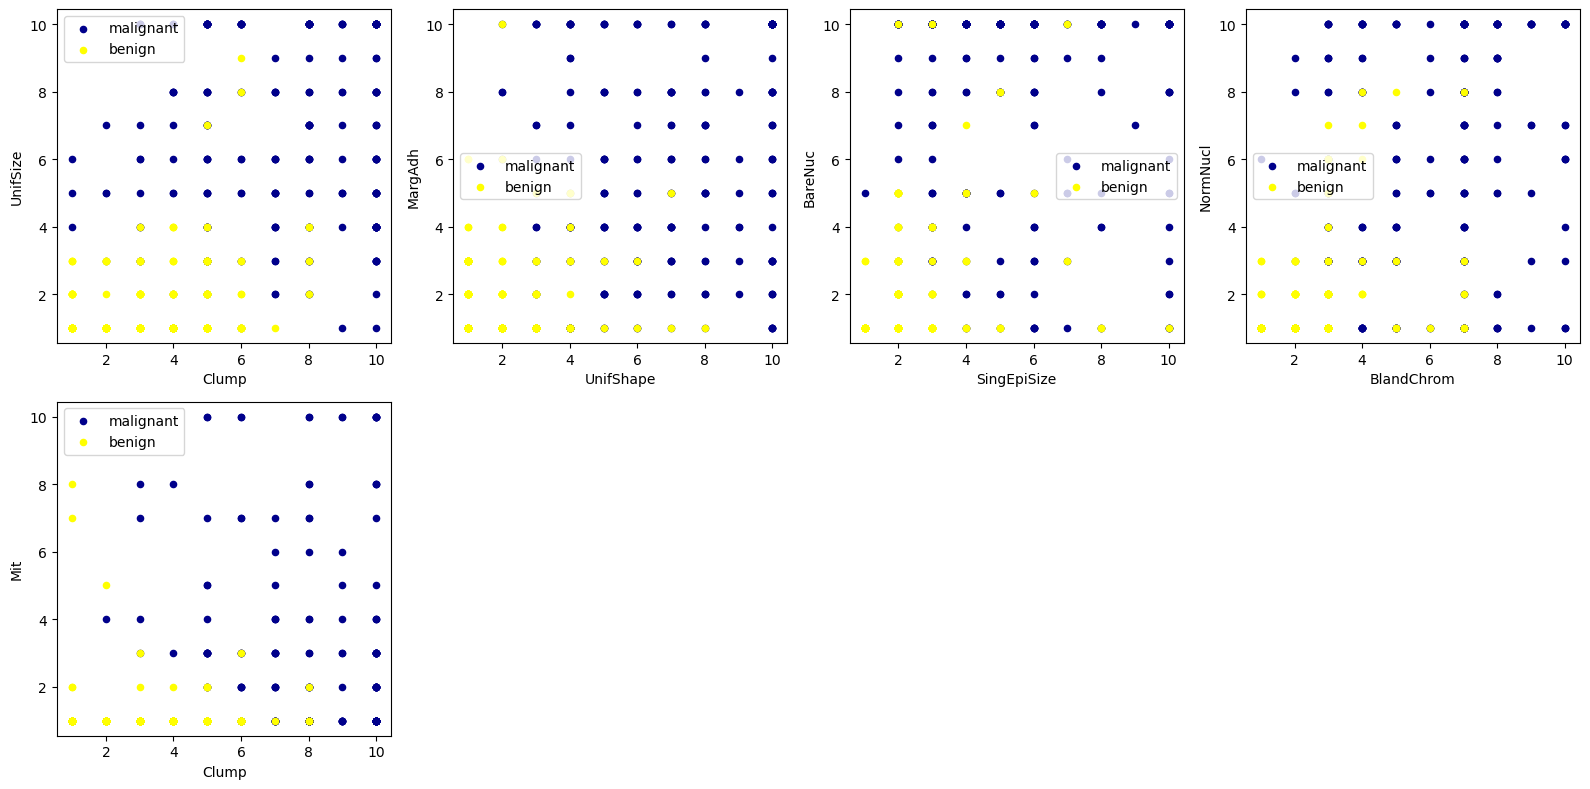

In [25]:
# use scatter

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(241)
cell_data[cell_data['Class'] == 4].plot.scatter(x='Clump', y='UnifSize', color='DarkBlue', label='malignant', ax=ax)
cell_data[cell_data['Class'] == 2].plot.scatter(x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax)
plt.tight_layout()

ax = fig.add_subplot(242)
cell_data[cell_data['Class'] == 4].plot.scatter(x='UnifShape', y='MargAdh', color='DarkBlue', label='malignant', ax=ax)
cell_data[cell_data['Class'] == 2].plot.scatter(x='UnifShape', y='MargAdh', color='Yellow', label='benign', ax=ax)
plt.tight_layout()

ax = fig.add_subplot(243)
cell_data[cell_data['Class'] == 4].plot.scatter(x='SingEpiSize', y='BareNuc', color='DarkBlue', label='malignant', ax=ax)
cell_data[cell_data['Class'] == 2].plot.scatter(x='SingEpiSize', y='BareNuc', color='Yellow', label='benign', ax=ax)
plt.tight_layout()

ax = fig.add_subplot(244)
cell_data[cell_data['Class'] == 4].plot.scatter(x='BlandChrom', y='NormNucl', color='DarkBlue', label='malignant', ax=ax)
cell_data[cell_data['Class'] == 2].plot.scatter(x='BlandChrom', y='NormNucl', color='Yellow', label='benign', ax=ax)
plt.tight_layout()

ax = fig.add_subplot(245)
cell_data[cell_data['Class'] == 4].plot.scatter(x='Clump', y='Mit', color='DarkBlue', label='malignant', ax=ax)
cell_data[cell_data['Class'] == 2].plot.scatter(x='Clump', y='Mit', color='Yellow', label='benign', ax=ax)
plt.tight_layout()

The distribution of Class doesn't seem having any clear pattern. 

### 4. Model Development

In this section, a SVM ( Support Vector Machines) is developed to classify the cells.  The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:
- 1.Linear
- 2.Polynomial
- 3.Radial basis function (RBF)
- 4.Precomputed
- 5.Sigmoid

Each of these functions has its characteristic, its pros and cons, and its equation, but as there is no easy way of knowing which function preforms best with any given dataset. Usually we choose different functions in turn and compare the results. Since "precomputed" kernal requires square matrix as input, it is not evaluated on this data set. 

#### 4.1 Linear

In [26]:
#import libraries
from sklearn import svm
from sklearn.metrics import mean_squared_error

In [27]:
#save the variabels and class to new variables
Variables = cell_data[["Clump", "UnifSize", "UnifShape", "MargAdh", "SingEpiSize", "BareNuc","BlandChrom","NormNucl","Mit"]]
Price = cell_data['Class']

In [28]:
#split the data
x_train, x_test, y_train, y_test = train_test_split(Variables, Price, test_size=0.20, random_state=1)

In [29]:
#create svm object
clf = svm.SVC(kernel='linear')

In [30]:
#fit the svm
clf.fit(x_train, y_train)

SVC(kernel='linear')

In [31]:
#Let's create a dataframe to record all scores
scores = pd.DataFrame(columns=['Kernel', 'R^2', 'MSE', 'F1 Score',' Jaccard score'], index=[0, 1, 2, 3])

In [32]:
#Let's calcualte the R^2 on the train data
r2 = clf.score(x_train, y_train)
print('The R-square of SVM with linear kernel is: ', round(r2,4))

The R-square of SVM with linear kernel is:  0.9707


In [33]:
#Let's calcualte the R^2 on the test data
r2t = clf.score(x_test, y_test)
print('The R-square of SVM with linear kernel is: ', round(r2t,4))

The R-square of SVM with linear kernel is:  0.9854


It looks like SVM fit the data pretty well. 

In [34]:
#predict price using test data
clf_predict = clf.predict(x_test)

In [35]:
mse = mean_squared_error(y_test, clf_predict)
print('The mean square error of price and predicted value is: ', round(mse,2))

The mean square error of price and predicted value is:  0.06


In [36]:
# Visualize the results
# import the visualization package: seaborn
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [37]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           2       0.98      1.00      0.99        90
           4       1.00      0.96      0.98        47

    accuracy                           0.99       137
   macro avg       0.99      0.98      0.98       137
weighted avg       0.99      0.99      0.99       137

Confusion matrix, without normalization
[[90  0]
 [ 2 45]]


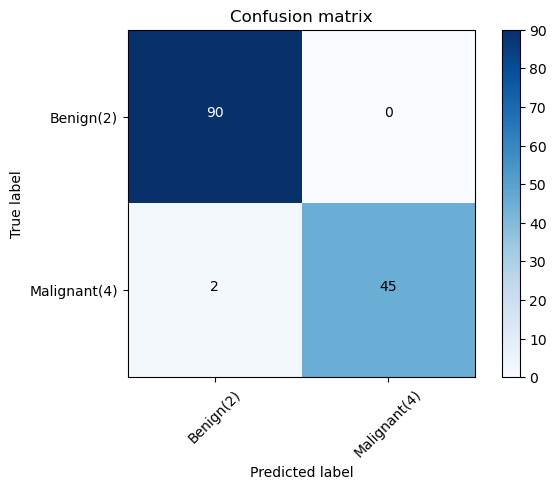

In [38]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, clf_predict, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, clf_predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

Other metrics to check the model is __f1_score__ and __jaccard index__.

In [39]:
from sklearn.metrics import f1_score
f1s = f1_score(y_test, clf_predict, average='weighted') 
print('The f1_score of SVM with linear kernel is: ', round(f1s,4))

The f1_score of SVM with linear kernel is:  0.9853


In [40]:
from sklearn.metrics import jaccard_score

In [41]:
jsc = jaccard_score(y_test, clf_predict, pos_label=2) 
print('The jaccard score of SVM with linear kernel is: ', round(jsc,4))

The jaccard score of SVM with linear kernel is:  0.9783


In [42]:
scores.loc[0] = ['Linear', r2t, mse, f1s, jsc]                   

#### 4.2 Polynomial

Let's try polynomial kernel. 

In [43]:
#create svm object
clf = svm.SVC(kernel='poly')
#fit the svm
clf.fit(x_train, y_train)
#predict price using test data
clf_predict = clf.predict(x_test)

In [44]:
#Let's calcualte the R^2 on the train data
print('The R-square of SVM with poly kernel on train data is: ', round(clf.score(x_train, y_train),4))
#Let's calcualte the R^2 on the test data
r2t = clf.score(x_test, y_test)
print('The R-square of SVM with poly kernel on test data is: ', round(r2t,4))
#mean square error
mse = mean_squared_error(y_test, clf_predict)
print('The mean square error of price and predicted value is: ', round(mse,2))
#f1 score
f1s = f1_score(y_test, clf_predict, average='weighted') 
print('The f1_score of SVM with poly kernel is: ', round(f1s,4))
#jaccard score
jsc = jaccard_score(y_test, clf_predict, pos_label=2) 
print('The jaccard score of SVM with poly kernel is: ', round(jsc,4))
scores.loc[1] = ['Poly', r2t, mse, f1s, jsc]   

The R-square of SVM with poly kernel on train data is:  0.9762
The R-square of SVM with poly kernel on test data is:  0.9635
The mean square error of price and predicted value is:  0.15
The f1_score of SVM with poly kernel is:  0.963
The jaccard score of SVM with poly kernel is:  0.9474


              precision    recall  f1-score   support

           2       0.95      1.00      0.97        90
           4       1.00      0.89      0.94        47

    accuracy                           0.96       137
   macro avg       0.97      0.95      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusion matrix, without normalization
[[90  0]
 [ 5 42]]


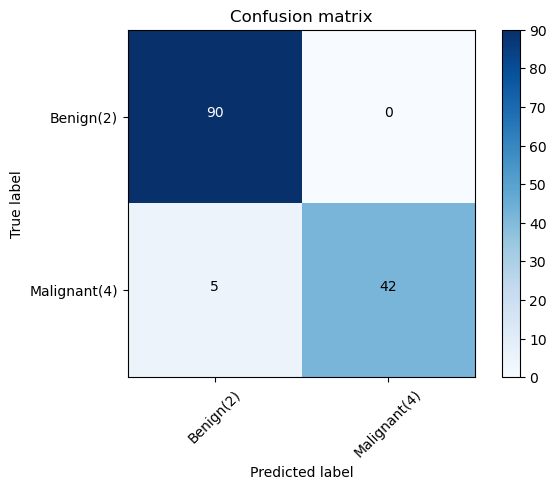

In [45]:
cnf_matrix = confusion_matrix(y_test, clf_predict, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, clf_predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

#### 4.3 RBF

In [46]:
#create svm object
clf = svm.SVC(kernel='rbf')
#fit the svm
clf.fit(x_train, y_train)
#predict price using test data
clf_predict = clf.predict(x_test)

In [47]:
#Let's calcualte the R^2 on the train data
print('The R-square of SVM with RBF kernel on train data is: ', round(clf.score(x_train, y_train),4))
#Let's calcualte the R^2 on the test data
r2t = clf.score(x_test, y_test)
print('The R-square of SVM with RBF kernel on test data is: ', round(r2t,4))
#mean square error
mse = mean_squared_error(y_test, clf_predict)
print('The mean square error of price and predicted value is: ', round(mse,2))
#f1 score
f1s = f1_score(y_test, clf_predict, average='weighted') 
print('The f1_score of SVM with RBF kernel is: ', round(f1s,4))
#jaccard score
jsc = jaccard_score(y_test, clf_predict, pos_label=2) 
print('The jaccard score of SVM with RBF kernel is: ', round(jsc,4))
scores.loc[2] = ['RBF', r2t, mse, f1s, jsc] 

The R-square of SVM with RBF kernel on train data is:  0.9744
The R-square of SVM with RBF kernel on test data is:  1.0
The mean square error of price and predicted value is:  0.0
The f1_score of SVM with RBF kernel is:  1.0
The jaccard score of SVM with RBF kernel is:  1.0


              precision    recall  f1-score   support

           2       1.00      1.00      1.00        90
           4       1.00      1.00      1.00        47

    accuracy                           1.00       137
   macro avg       1.00      1.00      1.00       137
weighted avg       1.00      1.00      1.00       137

Confusion matrix, without normalization
[[90  0]
 [ 0 47]]


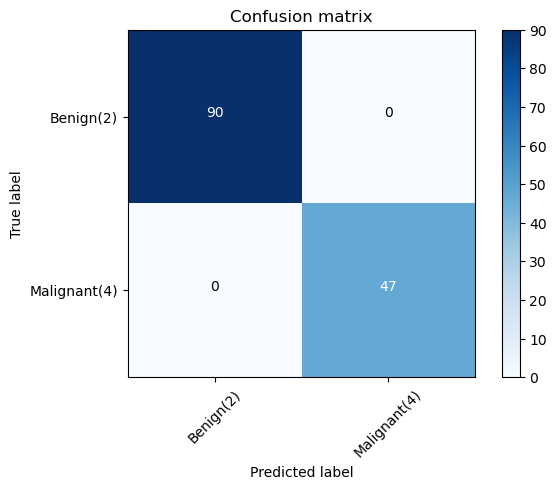

In [48]:
cnf_matrix = confusion_matrix(y_test, clf_predict, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, clf_predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

#### 4.4 Sigmoid

In [49]:
#create svm object
clf = svm.SVC(kernel='sigmoid')
#fit the svm
clf.fit(x_train, y_train)
#predict price using test data
clf_predict = clf.predict(x_test)

In [50]:
#Let's calcualte the R^2 on the train data
print('The R-square of SVM with sigmoid kernel on train data is: ', round(clf.score(x_train, y_train),4))
#Let's calcualte the R^2 on the test data
r2t = clf.score(x_test, y_test)
print('The R-square of SVM with sigmoid kernel on test data is: ', round(r2t,4))
#mean square error
mse = mean_squared_error(y_test, clf_predict)
print('The mean square error of price and predicted value is: ', round(mse,2))
#f1 score
f1s = f1_score(y_test, clf_predict, average='weighted') 
print('The f1_score of SVM with sigmoid kernel is: ', round(f1s,4))
#jaccard score
jsc = jaccard_score(y_test, clf_predict, pos_label=2) 
print('The jaccard score of SVM with sigmoid kernel is: ', round(jsc,4))
scores.loc[3] = ['Sigmoid', r2t, mse, f1s, jsc] 

The R-square of SVM with sigmoid kernel on train data is:  0.4121
The R-square of SVM with sigmoid kernel on test data is:  0.4234
The mean square error of price and predicted value is:  2.31
The f1_score of SVM with sigmoid kernel is:  0.3908
The jaccard score of SVM with sigmoid kernel is:  0.4234


              precision    recall  f1-score   support

           2       0.55      0.64      0.59        90
           4       0.00      0.00      0.00        47

    accuracy                           0.42       137
   macro avg       0.28      0.32      0.30       137
weighted avg       0.36      0.42      0.39       137

Confusion matrix, without normalization
[[58 32]
 [47  0]]


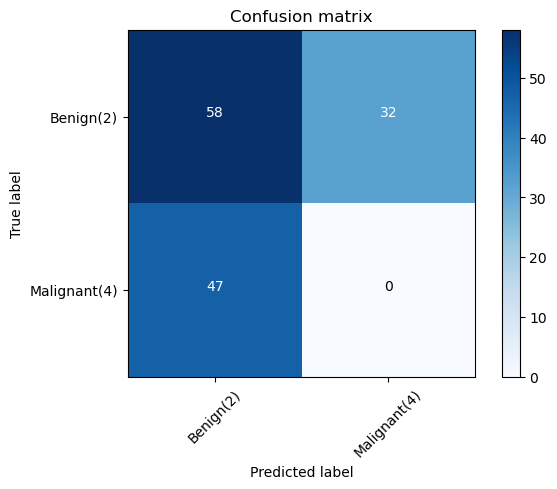

In [51]:
cnf_matrix = confusion_matrix(y_test, clf_predict, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, clf_predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

In [52]:
#print all scores and compare these 4 kernels.
scores

,Kernel,R^2,MSE,F1 Score,Jaccard score
0,Linear,0.985401,0.058394,0.985323,0.978261
1,Poly,0.963504,0.145985,0.962972,0.947368
2,RBF,1.0,0.0,1.0,1.0
3,Sigmoid,0.423358,2.306569,0.390792,0.423358


For this typical data set, SVM wiht RBF kernel fitted the data best, which had the highest scores and best confusion matrix performance. 